In [1]:
# Import library yang diperlukan
import cv2
import numpy as np
import os
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
from sklearn.svm import SVC

In [2]:
# Mendefinisikan path untuk folder train dan test
train_path = '/Users/wtrin/Documents/UAS_PKA/dataset/train'
test_path = '/Users/wtrin/Documents/UAS_PKA/dataset/test'

In [3]:
# Memuat data train
train_data = []
train_labels = []

for folder in ['email', 'resume', 'scientific_publication']:
    folder_path = os.path.join(train_path, folder)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64, 64))
        train_data.append(image)
        train_labels.append(folder)

In [4]:
# Memuat data test
test_data = []
test_labels = []

for folder in ['email', 'resume', 'scientific_publication']:
    folder_path = os.path.join(test_path, folder)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64, 64))
        test_data.append(image)
        test_labels.append(folder)

In [5]:
# Konversi data train dan test ke dalam bentuk array
X_train = np.array(train_data)
y_train = np.array(train_labels)
X_test = np.array(test_data)
y_test = np.array(test_labels)

In [6]:
# Ratakan data train dan test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [7]:
# Normalisasikan nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
# Latih model menggunakan rbf
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [9]:
# Buat prediksi pada data test
y_pred_test = clf.predict(X_test)

In [10]:
# Evaluasi model pada data test
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

In [11]:
# Cetak hasil evaluasi pada data test
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)

Test Accuracy: 0.7272727272727273
Test Precision: 0.7230769230769231
Test Recall: 0.7272727272727273
Test F1 Score: 0.7222222222222221


In [12]:
# Buat prediksi pada data train
y_pred_train = clf.predict(X_train)

In [13]:
# Evaluasi model pada data train
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

In [14]:
# Cetak hasil evaluasi pada data train
print("Train Accuracy:", accuracy_train)
print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1 Score:", f1_train)

Train Accuracy: 0.9621212121212122
Train Precision: 0.9659863945578231
Train Recall: 0.9621212121212122
Train F1 Score: 0.9625622091797458


In [15]:
# Menyiapkan label untuk grafik
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [16]:
# Menyiapkan data untuk grafik train dan test
train_scores = [accuracy_train, precision_train, recall_train, f1_train]
test_scores = [accuracy_test, precision_test, recall_test, f1_test]

In [17]:
x = np.arange(len(labels))  # label locations

In [18]:
# Lebar bar pada grafik
width = 0.35

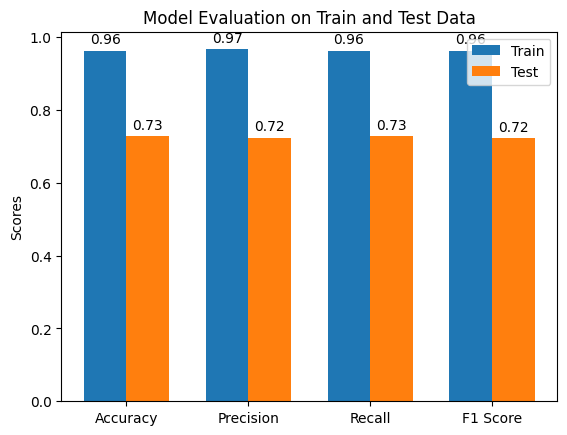

In [19]:
# Menampilkan grafik
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Menambahkan label, judul, dan legenda
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation on Train and Test Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan nilai pada bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Menampilkan grafik
plt.show()

In [20]:
# Mendapatkan confusion matrix untuk data train dan test
conf_matrix_train = confusion_matrix(y_train, y_pred_train, labels=['email', 'resume', 'scientific_publication'])
conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=['email', 'resume', 'scientific_publication'])

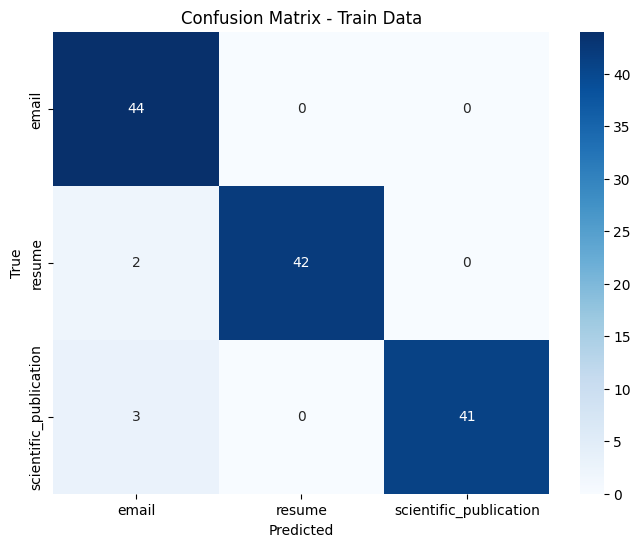

In [21]:
# Menampilkan confusion matrix untuk data train
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['email', 'resume', 'scientific_publication'], yticklabels=['email', 'resume', 'scientific_publication'])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Menyimpan confusion matrix untuk data train sebagai array
conf_matrix_train_array = np.array(conf_matrix_train)
print("Confusion Matrix - Train Data (as array):")
print(conf_matrix_train_array)

Confusion Matrix - Train Data (as array):
[[44  0  0]
 [ 2 42  0]
 [ 3  0 41]]


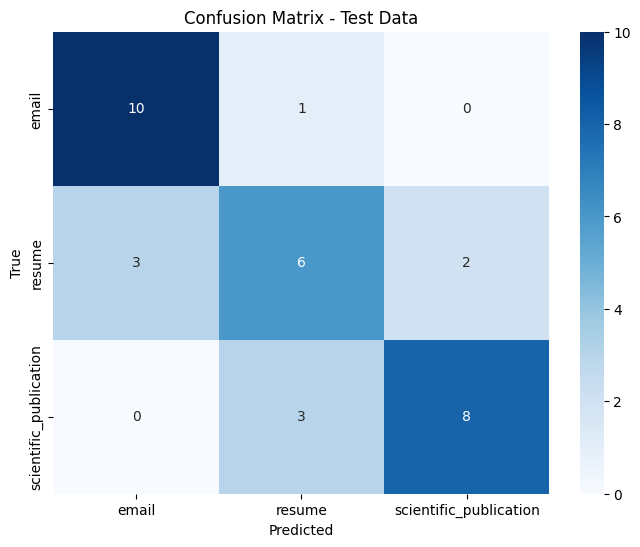

In [23]:
# Menampilkan confusion matrix untuk data test
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['email', 'resume', 'scientific_publication'], yticklabels=['email', 'resume', 'scientific_publication'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# Menyimpan confusion matrix untuk data test sebagai array
conf_matrix_test_array = np.array(conf_matrix_test)
print("Confusion Matrix - Test Data (as array):")
print(conf_matrix_test_array)

Confusion Matrix - Test Data (as array):
[[10  1  0]
 [ 3  6  2]
 [ 0  3  8]]


In [25]:
# Ukur waktu pelatihan
start_time_train = time.time()
clf.fit(X_train, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

In [26]:
# Buat prediksi pada data test
start_time_test = time.time()
y_pred_test = clf.predict(X_test)
end_time_test = time.time()
testing_time = end_time_test - start_time_test

In [27]:
# Cetak waktu pelatihan dan pengujian
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Training Time: 0.05 seconds
Testing Time: 0.02 seconds


In [28]:
from sklearn.decomposition import PCA  # Import PCA

In [29]:
# Normalisasikan nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [30]:
# Menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)  # Jumlah komponen dapat disesuaikan
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

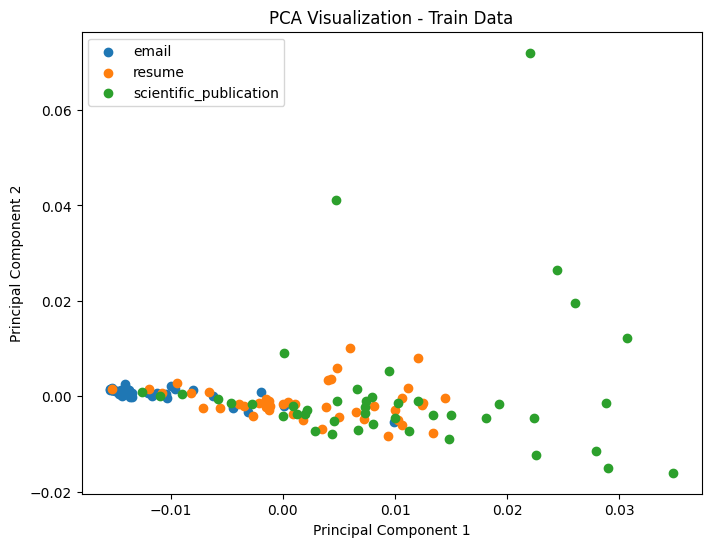

In [31]:
# Visualisasi data train
plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=label)
plt.title('PCA Visualization - Train Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

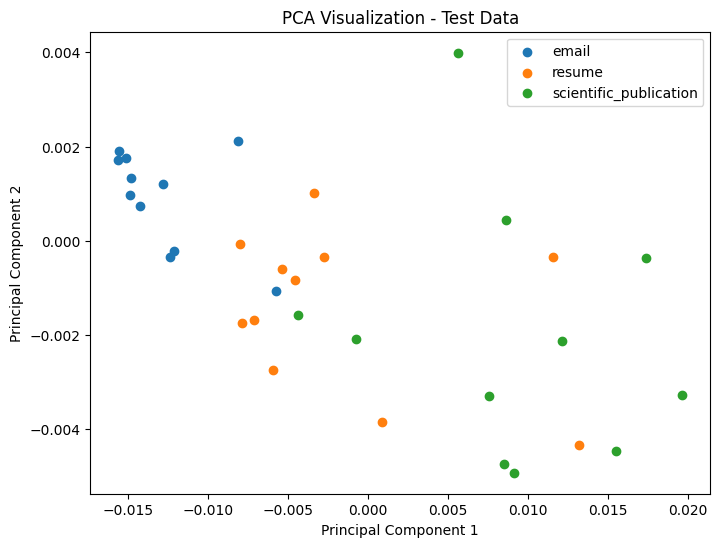

In [32]:
# Visualisasi data test
plt.figure(figsize=(8, 6))
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=label)
plt.title('PCA Visualization - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()